In [1]:
from importlib import reload
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

from functools import partial
import copy

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.2.5.dev1+g28b07b4'

# Kinematik of the experiments

In [7]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [8]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


# Horowitz

In [4]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

## Pb208

In [5]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


In [6]:
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()

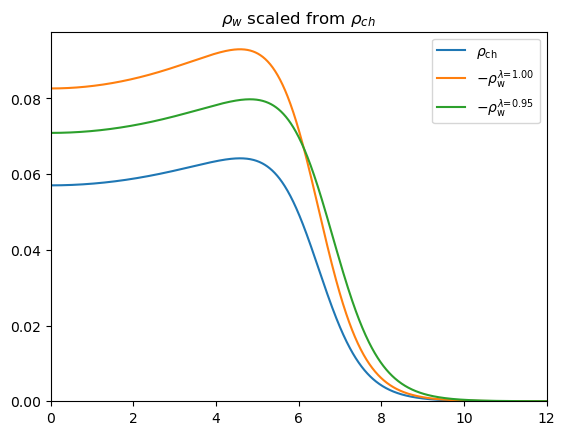

In [7]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-Pb208_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-Pb208_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,)
plt.legend()

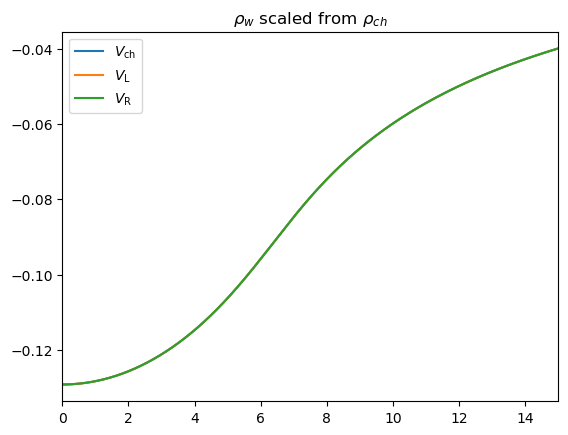

In [8]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r)-Pb208_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,Pb208_test1.electric_potential(r)+Pb208_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

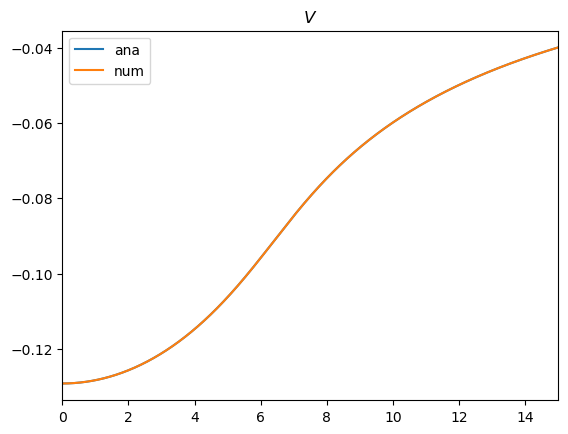

In [9]:
r=np.arange(0,15,1e-2)
plt.title(r'$V$')
plt.plot(r,Pb208_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'num')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

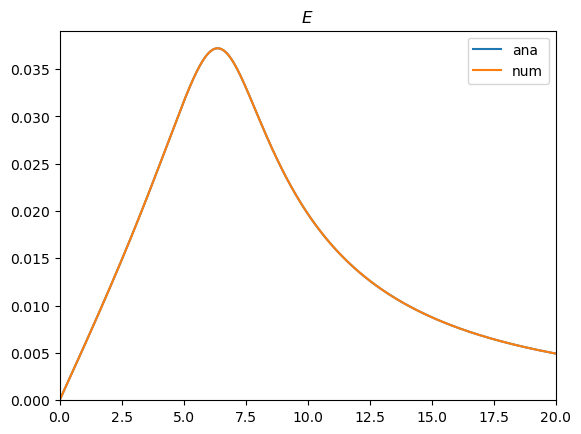

In [10]:
r=np.arange(1e-3,20,1e-2)
plt.title(r'$E$')
plt.plot(r,Pb208_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_field(r),label=r'num')
plt.xlim(0,20)
plt.ylim(0,)
plt.legend()

In [11]:
print(Pb208_test1.Vmin)
print(Pb208_test1.Vmin_ana)

-0.12919621029287431
-0.1291961769809547


## He4

In [100]:
He4_test1 = phr.nucleus('He4_test_100',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test1.fill_gaps()
He4_test2 = phr.nucleus('He4_test_095',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_He4_test_095fermi3p_x=0.0-1000.0-1.0.txt


In [101]:
He4_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=He4_test1)
He4_test1.update_dependencies()
He4_test2.weak_density = partial(weak_density_model,lam=np.sqrt(0.99),nucleus=He4_test2) # unclear what value for lambda
He4_test2.update_dependencies()

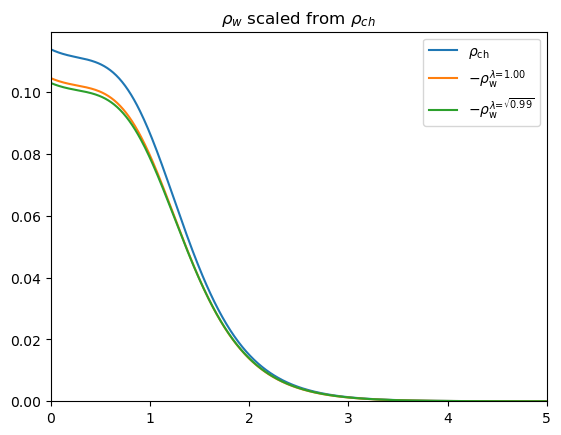

In [102]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-He4_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-He4_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=\sqrt{0.99}}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

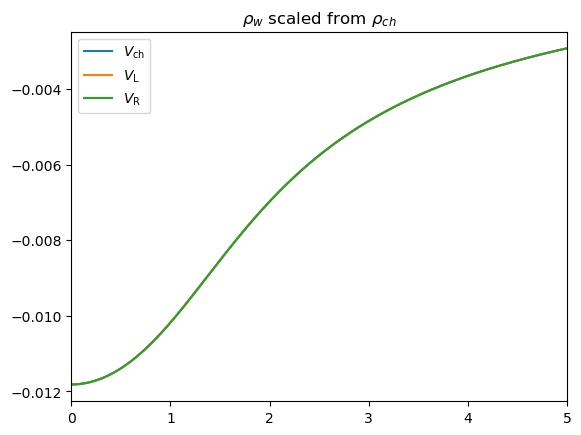

In [104]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,He4_test1.electric_potential(r)-He4_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,He4_test1.electric_potential(r)+He4_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

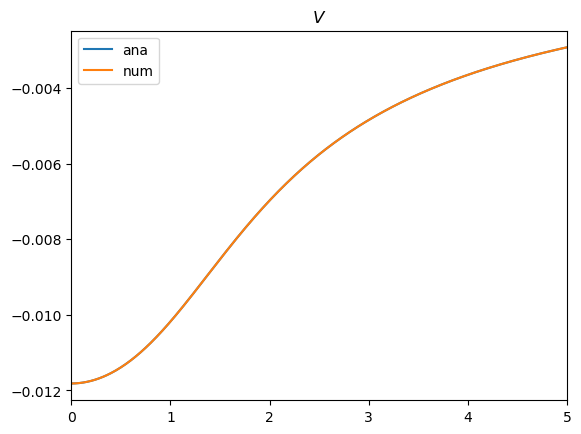

In [105]:
r=np.arange(0,5,1e-2)
plt.title(r'$V$')
plt.plot(r,He4_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_potential(r),label=r'num')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

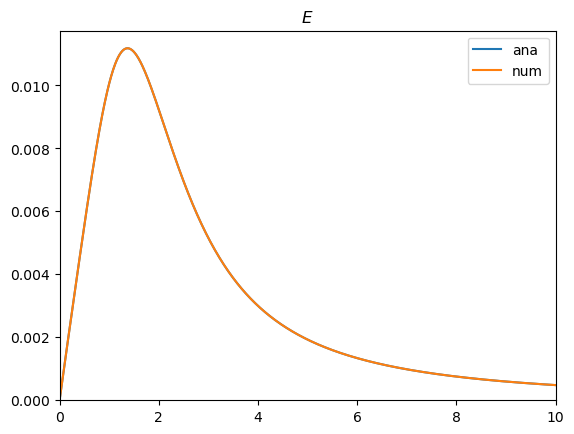

In [106]:
r=np.arange(1e-3,10,1e-2)
plt.title(r'$E$')
plt.plot(r,He4_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_field(r),label=r'num')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

In [107]:
print(He4_test1.Vmin)
print(He4_test1.Vmin_ana)

-0.01181459495047158
-0.011814594146245952


# A_PV (compare Horowitz 1998)

## Pb208

### Optimise settings

In [12]:
Pb208_ref_test = phr.nuclei.references.load_reference_nucleus(82,208)[0]
Pb208_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_ref_test)
Pb208_ref_test.update_dependencies()

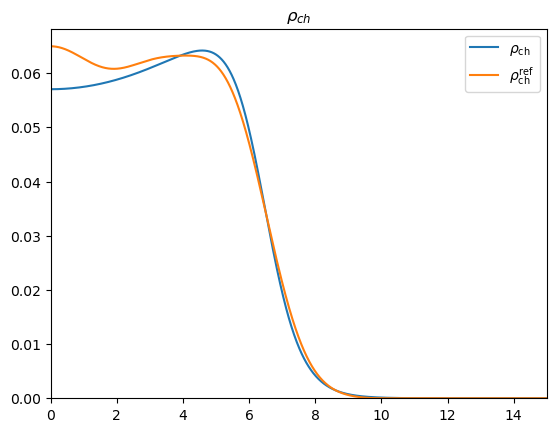

In [13]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,Pb208_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref}_\operatorname{ch}$')
plt.xlim(0,15)
plt.ylim(0,)
plt.legend()

In [144]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False)

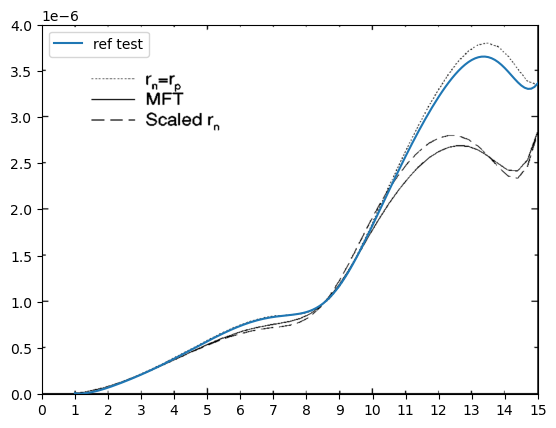

In [145]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

In [146]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_Pb208=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,Pb208_ref_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 68.65472865104675 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 65.36691164970398 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 62.64877223968506 diff: 2.409732765304056e-06
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 61.342159271240234 diff: 2.3846314094053963e-05
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 58.16401791572571 diff: 6.375751315805257e-06
new best: {'method': 'DOP853', 'N_partial_wa

In [147]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [150]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False,**args_APV_Pb208)

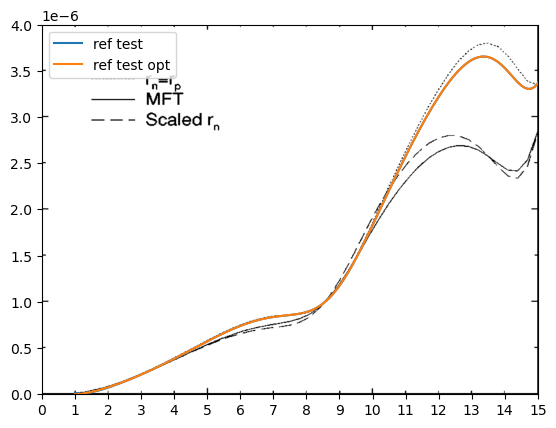

In [151]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opt')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

### Compare

In [12]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [13]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test2,verbose=False,**args_APV_Pb208)
print('APV2 done')

Start
3.711921149290691
346.66324475043103
2285.134021600323
5651843.000857022
352147498.5677524
229155880503.76276
27091265654258.426
1.8610386601695784e+16
2.8049413349476695e+18
2.5777431892939595e+21
3.607129328274583e+23
5.403932068386096e+26
4.073723550870314e+28
1.5572501929486889e+32
7.684448395118076e+33
5.671064046536716e+37
1.412831853833943e+40
2.392211145727387e+43
1.370341669161298e+46
1.0252286620183615e+49
1.2422490104509406e+52
2.881373020604538e+54
1.1096448954349757e+58
2.5062226111425693e+60
9.291373305024631e+63
7.634592233188148e+66
5.829093064885108e+69
1.291822723069631e+73
1.4504916580044736e+75
1.6811090919024823e+79
1.5692247996256e+82
1.3058356594504626e+85
3.852391897811481e+88
1.4539711044303033e+91
5.808048360858258e+94
9.406770338212339e+97
1.2728657041515073e+100
2.2794951760705336e+104
2.7129917221213166e+107
1.919879851847087e+110
9.970090553888847e+113
1.0123915327738435e+117
1.2475026220480892e+120
5.2117233859858083e+123
5.357530075856412e+126
7.32

KeyboardInterrupt: 

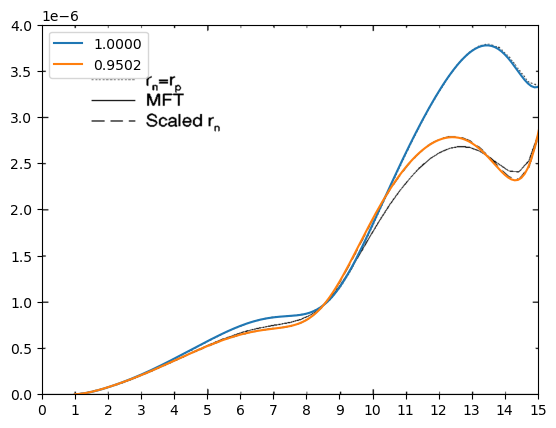

In [154]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

(0.0, 5e-05)

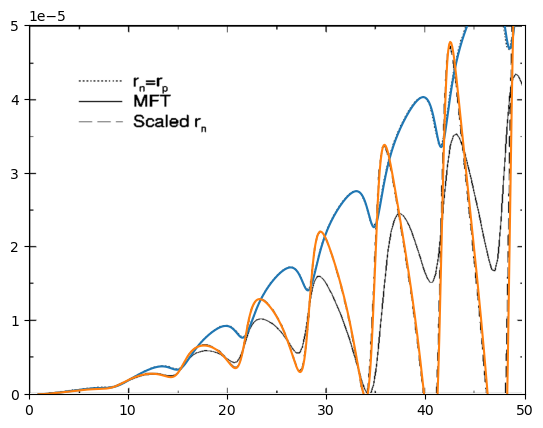

In [181]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

In [14]:
theta_deg=np.arange(1,50,1e-1)
E3_MeV=3000
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})

Calculate left crosssection ...
E= 2953.543357738739 MeV
r0= 0.0115 fm
rc= 19.900000000000002 fm
Calculate phaseshift for kappa= -1 , delta_diff= 0.9579078159225604
0.2984165235097609
Calculate phaseshift for kappa= -2 , delta_diff= 33.63316700626391
0.9825335498003978
Calculate phaseshift for kappa= -3 , delta_diff= 442.11417095198715
1.2913590550414762
Calculate phaseshift for kappa= -4 , delta_diff= 33739.28321714827
1.4931513901970133
Calculate phaseshift for kappa= -5 , delta_diff= 1568483.4817066004
-1.498287440998951
Calculate phaseshift for kappa= -6 , delta_diff= 91541185.8745945
-1.3786943144273915
Calculate phaseshift for kappa= -7 , delta_diff= 8997603936.997965
-1.2793519587421467
Calculate phaseshift for kappa= -8 , delta_diff= 499919711884.3409
-1.1944375617543868
Calculate phaseshift for kappa= -9 , delta_diff= 83850946131326.1
-1.1203370764078433
Calculate phaseshift for kappa= -10 , delta_diff= 4721899702378286.0
-1.0546517848437196
Calculate phaseshift for kappa= -11

In [183]:
from scipy.special import spherical_jn

In [190]:
z0=3000*0.0115/phr.constants.hc
z0

0.17483670975993915

In [198]:
n=100
spherical_jn(n,z0)

1.3681960085118643e-265

In [139]:
theta_deg=np.arange(1,50,1e-1)
E1_MeV=502
E2_MeV=850
E3_MeV=3000
print('Start')
A_PV_502 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E1_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('502 done')
A_PV_850 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E2_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('850 done')
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})
print('3000 done')

Start
502 done
850 done
Calculate left crosssection ...
E= 2953.543357738739 MeV
r0= 0.0115 fm
rc= 19.900000000000002 fm
Calculate phaseshift for kappa= -1 , delta_diff= 0.2984165235097609
Calculate phaseshift for kappa= -2 , delta_diff= 0.9825335498003978
Calculate phaseshift for kappa= -3 , delta_diff= 1.2913590550414762
Calculate phaseshift for kappa= -4 , delta_diff= 1.4931513901970133
Calculate phaseshift for kappa= -5 , delta_diff= -1.498287440998951
Calculate phaseshift for kappa= -6 , delta_diff= -1.3786943144273915
Calculate phaseshift for kappa= -7 , delta_diff= -1.2793519587421467
Calculate phaseshift for kappa= -8 , delta_diff= -1.1944375617543868
Calculate phaseshift for kappa= -9 , delta_diff= -1.1203370764078433
Calculate phaseshift for kappa= -10 , delta_diff= -1.0546517848437196
Calculate phaseshift for kappa= -11 , delta_diff= -0.9957075552689183
Calculate phaseshift for kappa= -12 , delta_diff= -0.9422893384027087
Calculate phaseshift for kappa= -13 , delta_diff= -0.

In [140]:
q1_fm = 2*E1_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q2_fm = 2*E2_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)

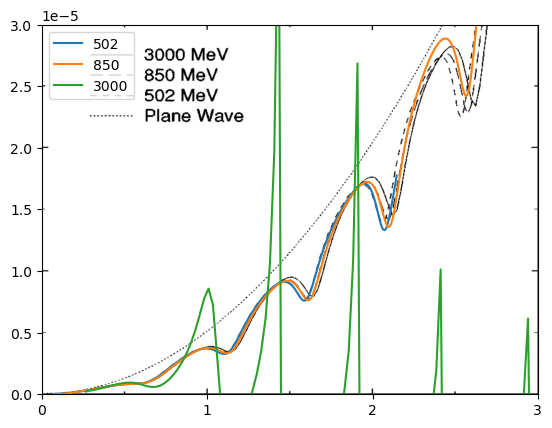

In [141]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
plt.legend()

# H4

### Optimise Settings

In [108]:
He3_ref_test = phr.nuclei.references.load_reference_nucleus(2,3)
He3_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=He3_ref_test)
He3_ref_test.update_dependencies()

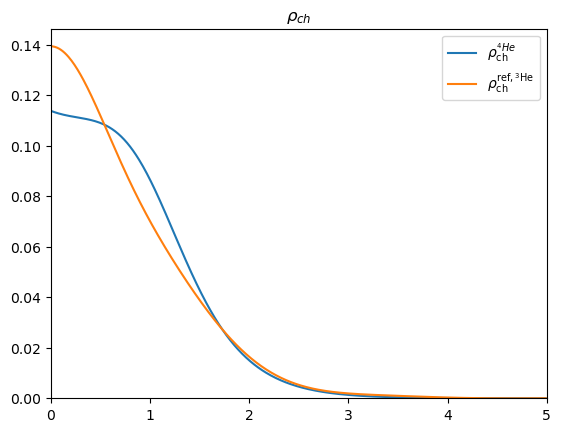

In [109]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho^{^{4}He}_\operatorname{ch}$')
plt.plot(r,He3_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref,^{3}He}_\operatorname{ch}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

In [110]:
# no good FB parameterisation need to optimise direct description
# need to run on fast maschine!

In [111]:
# very slow ->

In [120]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-7})

Calculate left crosssection ...
E= 656.2172129783868 MeV
r0= 0.0001 fm
rc= 19.900000000000002 fm
Calculate phaseshift for kappa= -1 , delta_diff= -0.0197121341164479
Calculate phaseshift for kappa= -2 , delta_diff= -0.009633075758140652
Calculate phaseshift for kappa= -3 , delta_diff= -0.005011638647845373
Calculate phaseshift for kappa= -4 , delta_diff= -0.002594359474480612
Calculate phaseshift for kappa= -5 , delta_diff= -0.0013209090125219092
Calculate phaseshift for kappa= -6 , delta_diff= -0.0006617440447977962
Calculate phaseshift for kappa= -7 , delta_diff= -0.0003270792395213551
Calculate phaseshift for kappa= -8 , delta_diff= -0.00015987753451263131
Calculate phaseshift for kappa= -9 , delta_diff= -7.740971627789861e-05
Calculate phaseshift for kappa= -10 , delta_diff= -3.716434149048098e-05
Calculate phaseshift for kappa= -11 , delta_diff= -1.7703553470749256e-05
Calculate phaseshift for kappa= -12 , delta_diff= -8.37018834642933e-06
Calculate phaseshift for kappa= -13 , del

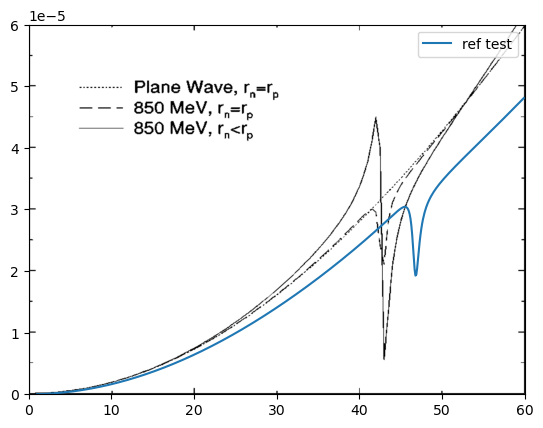

In [121]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

In [128]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
args_APV_He4=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,He4_test1,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 18.207270622253418 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 16.40820550918579 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 14.845350980758667 diff: 6.247708374288192e-08
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 13.884968280792236 diff: 1.249542360927106e-07
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 13.126539468765259 diff: 2.4077441868990277e-07
new best: {'method': 'DOP853', 'N_partial_w

In [130]:
#args_APV_He3={'method': 'DOP853', 'N_partial_waves': 80, 'atol': 1e-11, 'rtol': 1e-11, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-07}

In [131]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He4)

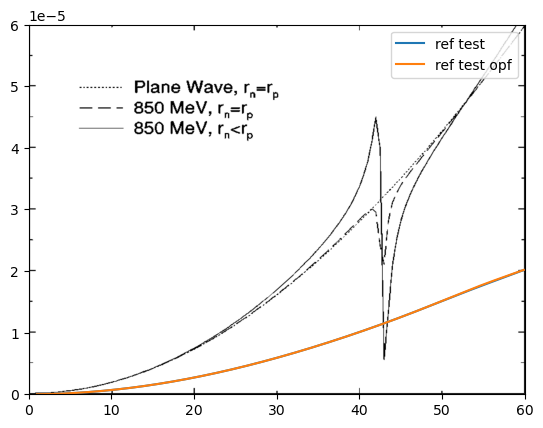

In [137]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opf')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

### Compare

In [129]:
args_APV_He4={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-11, 'rtol': 1e-11, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-07}

In [130]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He4)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,verbose=False,**args_APV_He4)
print('APV2 done')

Start
APV1 done
APV2 done


In [127]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV1_2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_Pb208)
print('APV1 done')
A_PV2_2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,verbose=False,**args_APV_Pb208)
print('APV2 done')

Start
APV1 done
APV2 done


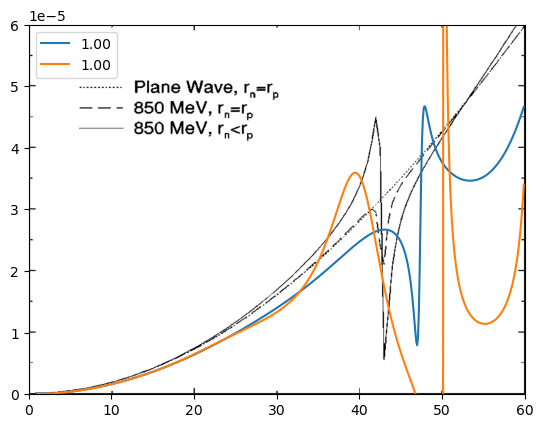

In [131]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.00')
#plt.plot(theta_deg,A_PV2,label=r'\sqrt{0.99}')
#
plt.plot(theta_deg,A_PV1_2,label='1.00')
#plt.plot(theta_deg,A_PV2_2,label=r'\sqrt{0.99}')

#
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

# pictures

(0.0, 4e-06)

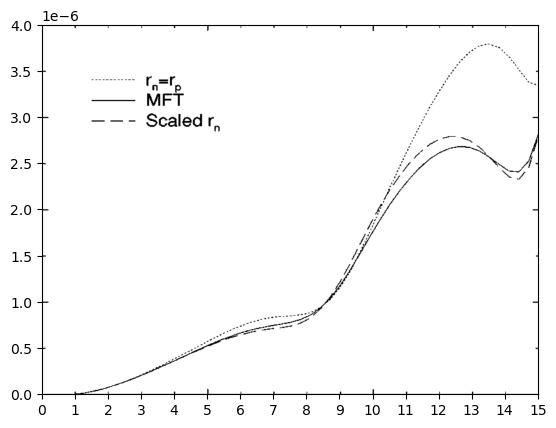

In [15]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

(0.0, 5e-05)

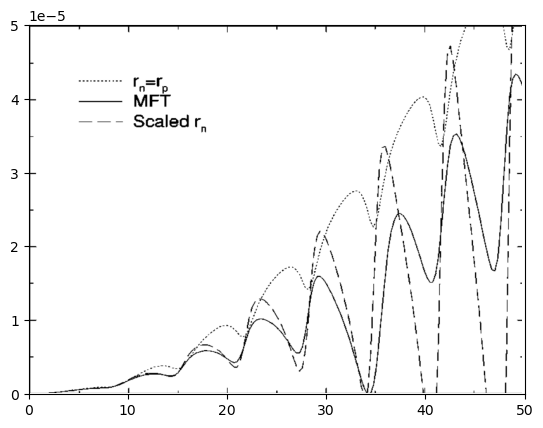

In [182]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

(0.0, 3e-05)

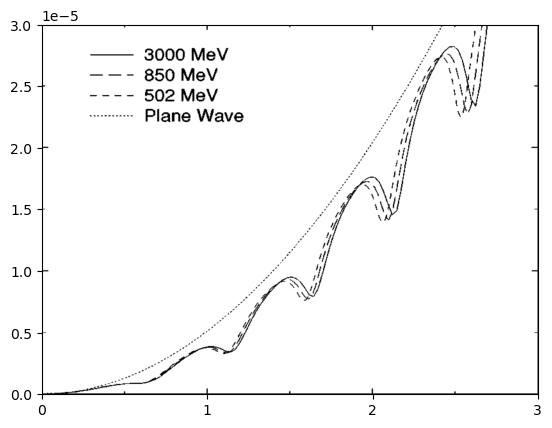

In [94]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()